In [1]:
# import all the neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Doctor_Train.xlsx to Doctor_Train (1).xlsx


In [3]:
#Loading the Train and Test data
Train_data = pd.read_excel('Doctor_Train.xlsx')
Test_data  = pd.read_excel('Doctor_Test.xlsx')

In [4]:
# Seeing first five rows of Training data
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
# Seeing first five rows of Testing data
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
# Checking the shape of train and test data

print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (5961, 7)


Test_data: (1987, 6)


## **Train_data**

In [7]:
#Checking the shape of Train data
Train_data.shape

(5961, 7)

Observation:

There are 5961 rows and 7 columns are present in train dataset.

In [8]:
#Checking the columns of Train data
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

### **checking for missing values**

In [9]:
#Checking  for  anynull values
Train_data.isnull().values.any()

True

In [10]:
#checking for null values in columns
Train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

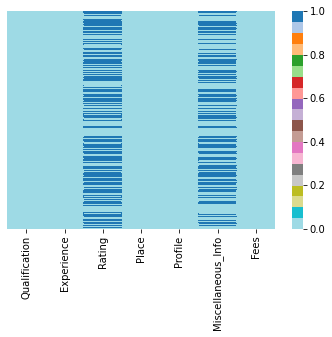

In [11]:
#Now we check  for null value via visualization

sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=True,cmap='tab20_r')
plt.show()

Observation:

1-There are 3302 null values are present in Rating column.

2-25 null values are present in Place column.

3-2620 null values present in Miscellaneous_Info column.

In [12]:
#checking the information of column
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Observation:

1-Rating, Place, Micellaneous_Info contain missing values.

2-We have to remove Miscellaneous_Info column because it has a lot of missing data and it consists of the ratings, place which is already in a different columns.

3-In Rating and Place columns, varibles are of  categorical datatype .So, we impute the missing values with most frequent value i.e. mode.

In [13]:
#Dropping Miscellaneous_Info column as it has no use
Train_data.drop('Miscellaneous_Info',axis=1,inplace=True)
Train_data.head()


,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


Miscellaneous_Info column has been removed.

In [14]:
#Imputing the missing value with mode

for col in ['Rating','Place']:
  Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)

In [15]:
#now again check for missing values
Train_data.isnull().values.any()

False

In [16]:
#checking for null values in columns again
Train_data.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

Observation :

There is no null value present in our dataset.

In [17]:
#Now checking the shape
Train_data.shape

(5961, 6)

In [18]:
#checking the datatypes of train dataset
Train_data.dtypes

Qualification    object
Experience       object
Rating           object
Place            object
Profile          object
Fees              int64
dtype: object

Observation

1- All the columns are object type except Price column which is int data type and our independent variable.

2- Before going further we have to change the data type of column which have object data type and also we have to change the value inside the columns because our model does not understand string values.

In [19]:
#Exploing Data Variable
for column in Train_data.columns:
    if Train_data[column].dtypes==object:
        print(str(column)+':'+str(Train_data[column].unique()))
        print(Train_data[column].value_counts())
        print('********************************************************************')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                       488
BHMS                                                                                      477
BAMS                                                                                      471
MBBS                                                                                      334
MBBS, MS - ENT                                                                            220
                                                                                         ... 
BDS, PhD - Orthodontics & Dentofacial Orthopaedics, Certificate of Oral Implanto

## **Exploratory Data Analysis**

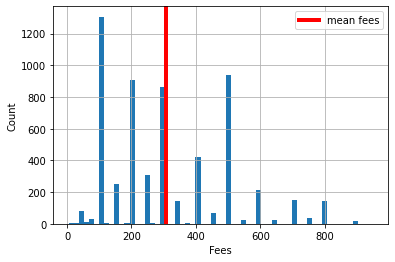

In [20]:
#Checking the mean price.

price = Train_data['Fees'].hist(bins=60)
mean_val = np.mean(Train_data['Fees'])
plt.axvline(mean_val,linewidth=4, color='red', label='mean fees')
plt.xlabel('Fees')
plt.ylabel('Count')
plt.legend()
plt.show()

In [21]:
#checking the unique value in the Qualification data column.
Train_data['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

Observations:

1- We observe that qualifications are not sorted due to leading whitespace.

2- We also need to remove other inconsistensies in the data like
replace comma inside bracket by hyphen.

3- lowercase all the words.

4-remove spaces within qualification.

Lets work on them and sort the variables character wise.

**We have to create separate columns for Qualification for analyzing.**

In [22]:
Train_data['Qualification_count'] = Train_data['Qualification'].apply(lambda x: len(x.split(",")))

Train_data['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [23]:
Train_data['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [24]:
# Extract relevant qualification
# DICT of qualification with there counts
Train_data["Qualification"]=Train_data["Qualification"].str.split(",")
Qualification ={}
for x in Train_data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [25]:
#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [26]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    Train_data[qual] = 0

for x,y in zip(Train_data['Qualification'].values, np.array([i for i in range(len(Train_data))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            Train_data[c][y] = 1

In [27]:
# Now we can drop the extra qualification which we added 
Train_data.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [28]:
Train_data.head()

,Experience,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,0,0,0,1,0,0,0,0,0,1
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,0,0,1,0,0,0,0,0,0,0
2,9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300,1,0,0,0,0,0,0,0,0,0
3,12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250,0,0,1,0,0,0,0,0,0,0
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,0,0,1,0,0,0,0,0,0,0


**Convert Experience into integer value.**

In [29]:
# Experience
Train_data['years_exp'] = Train_data['Experience'].str.slice(stop=2).astype(int)

In [30]:
Train_data.head()

,Experience,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,0,0,0,1,0,0,0,0,0,1,24
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,0,0,1,0,0,0,0,0,0,0,12
2,9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,9
3,12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,12
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,20


In [31]:
#Dropping Experience column as we already assign a new cloumn for experience i.e. years_exp
Train_data.drop('Experience',axis=1,inplace=True)

In [32]:
Train_data.head()

,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp
0,100%,"Kakkanad, Ernakulam",Homeopath,100,0,0,0,1,0,0,0,0,0,1,24
1,98%,"Whitefield, Bangalore",Ayurveda,350,0,0,1,0,0,0,0,0,0,0,12
2,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,9
3,100%,"Bannerghatta Road, Bangalore",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,12
4,100%,"Keelkattalai, Chennai",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,20


In [33]:
#convert Rating column from string tpe to int type
Train_data['Rating'] = Train_data['Rating'].str.slice(stop=-1).astype(int)
Train_data.head()

,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp
0,100,"Kakkanad, Ernakulam",Homeopath,100,0,0,0,1,0,0,0,0,0,1,24
1,98,"Whitefield, Bangalore",Ayurveda,350,0,0,1,0,0,0,0,0,0,0,12
2,100,"Mathikere - BEL, Bangalore",ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,9
3,100,"Bannerghatta Road, Bangalore",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,12
4,100,"Keelkattalai, Chennai",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,20


In [34]:
#Separate City and Locality in Place column

Train_data['City'] = Train_data['Place'].str.split(',').str[1]
Train_data['Locality'] = Train_data['Place'].str.split(',').str[0]

In [35]:
Train_data.head()

,Rating,Place,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp,City,Locality
0,100,"Kakkanad, Ernakulam",Homeopath,100,0,0,0,1,0,0,0,0,0,1,24,Ernakulam,Kakkanad
1,98,"Whitefield, Bangalore",Ayurveda,350,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Whitefield
2,100,"Mathikere - BEL, Bangalore",ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,9,Bangalore,Mathikere - BEL
3,100,"Bannerghatta Road, Bangalore",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Bannerghatta Road
4,100,"Keelkattalai, Chennai",Ayurveda,250,0,0,1,0,0,0,0,0,0,0,20,Chennai,Keelkattalai


In [36]:
#Now we can drop the place variable
Train_data.drop('Place',axis=1,inplace=True)

In [37]:
Train_data.head()

,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp,City,Locality
0,100,Homeopath,100,0,0,0,1,0,0,0,0,0,1,24,Ernakulam,Kakkanad
1,98,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Whitefield
2,100,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,9,Bangalore,Mathikere - BEL
3,100,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Bannerghatta Road
4,100,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,20,Chennai,Keelkattalai


**Rating vs Fees**

In [38]:
print(Train_data['Rating'].value_counts())

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64


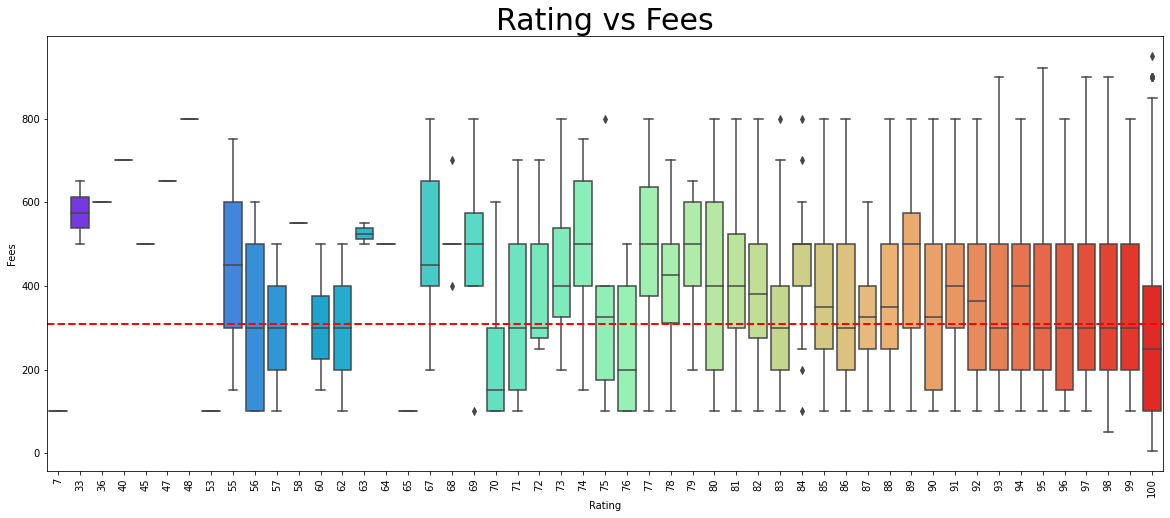

In [39]:
#Rating vs Fees
plt.figure(figsize=(20,8))
mean_Fees=np.mean(Train_data['Fees'])
sns.boxplot(y='Fees',x='Rating' ,data=Train_data,palette="rainbow")
plt.axhline(mean_Fees,color='r',linestyle='dashed',linewidth=2)
plt.title("Rating vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

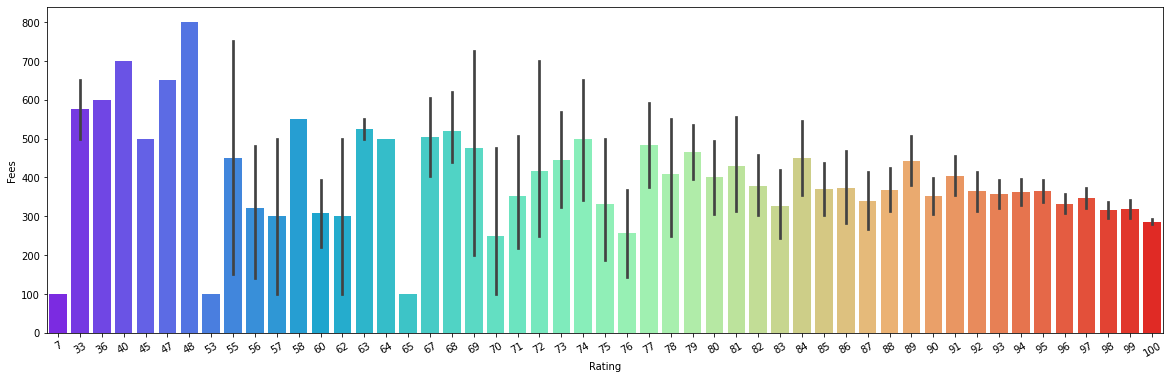

In [40]:
plt.figure(figsize=(20,6))
sns.barplot(y='Fees',x='Rating' ,data=Train_data,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

Observation:

From above graph we can say that Rating of 48% doctors  have the highest Fees .

There are some outliers present in Ratings and price which needs to be removed.

**Profile vs Fees**

In [41]:
print(Train_data['Profile'].value_counts())

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


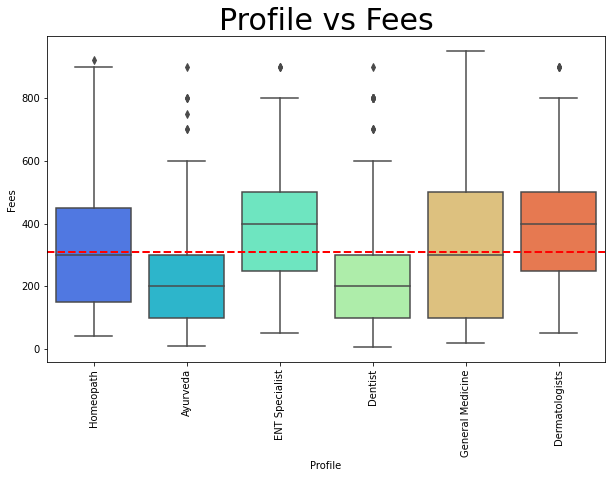

In [42]:
#Profile vs Fees
plt.figure(figsize=(10,6))
mean_Fees=np.mean(Train_data['Fees'])
sns.boxplot(y='Fees',x='Profile' ,data=Train_data,palette="rainbow")
plt.axhline(mean_Fees,color='r',linestyle='dashed',linewidth=2)
plt.title("Profile vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

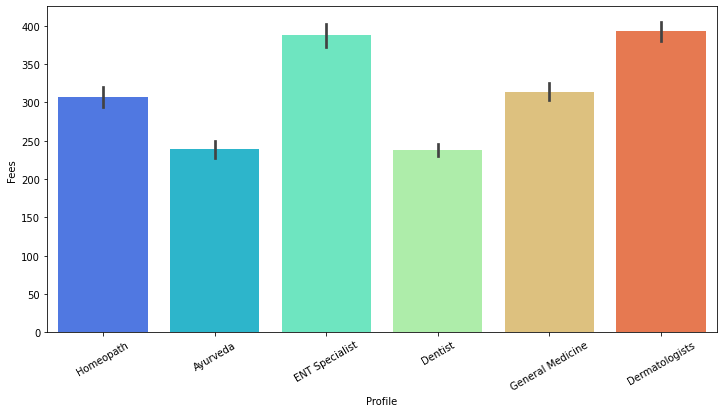

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(y='Fees',x='Profile' ,data=Train_data,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

Observation:

From above graph we can say that Dermatologists and ENT Specialist had the highest Fees .

There are some outliers present  which needs to be removed.

**years_exp Vs Fees**

In [44]:
print(Train_data['years_exp'].value_counts())

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: years_exp, Length: 64, dtype: int64


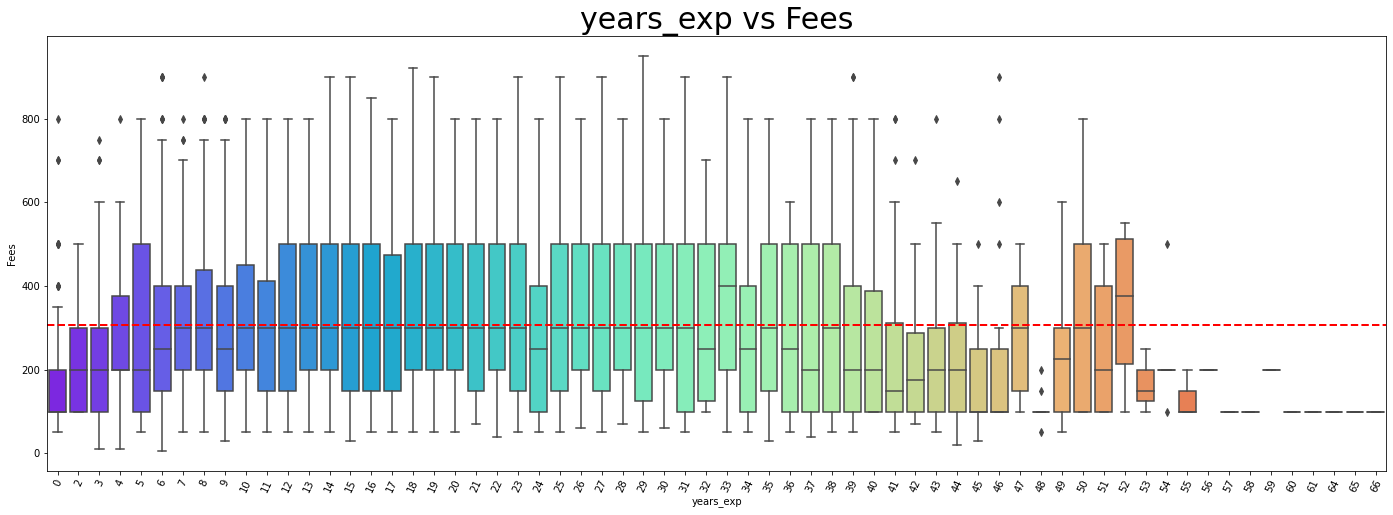

In [45]:
#years_exp vs Fees
plt.figure(figsize=(24,8))
mean_Fees=np.mean(Train_data['Fees'])
sns.boxplot(y='Fees',x='years_exp' ,data=Train_data,palette="rainbow")
plt.axhline(mean_Fees,color='r',linestyle='dashed',linewidth=2)
plt.title("years_exp vs Fees",fontsize=30)
plt.xticks(rotation=65)
plt.show()

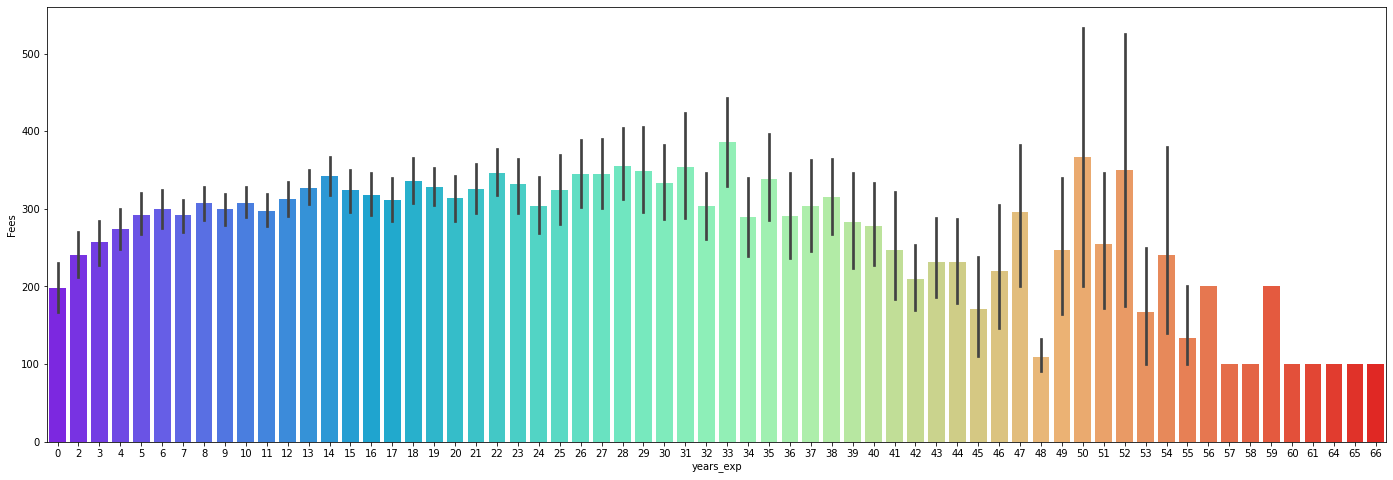

In [46]:
plt.figure(figsize=(24,8))
sns.barplot(y='Fees',x='years_exp' ,data=Train_data,palette="rainbow")
plt.xticks(rotation=0)
plt.show()

Observation:

From above graph we can say that the doctors which have 33 years of  have the highest Fees .

There are some outliers present which needs to be removed.

**City vs Fees**

In [47]:
print(Train_data['City'].value_counts())

 Bangalore             1283
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: City, dtype: int64


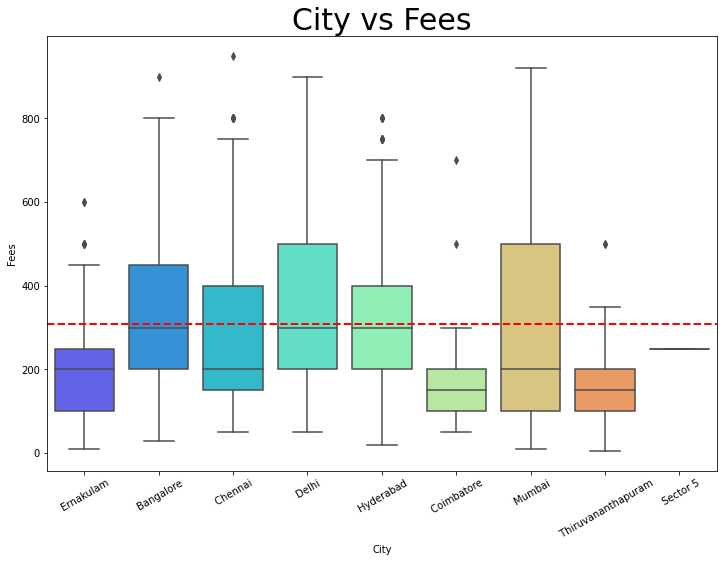

In [48]:
#City vs Fees
plt.figure(figsize=(12,8))
mean_Fees=np.mean(Train_data['Fees'])
sns.boxplot(y='Fees',x='City' ,data=Train_data,palette="rainbow")
plt.axhline(mean_Fees,color='r',linestyle='dashed',linewidth=2)
plt.title("City vs Fees",fontsize=30)
plt.xticks(rotation=30)
plt.show()

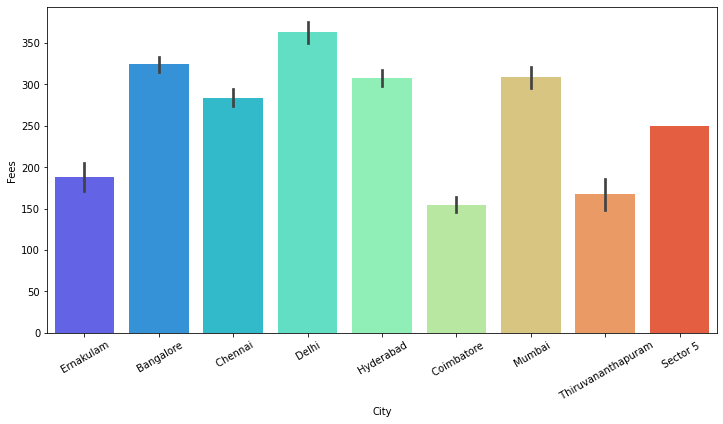

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(y='Fees',x='City' ,data=Train_data,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

Observation:

From above graph we can say that, those  doctors which lives in Delhi have the highest Fees and those who lives in coimbatore have the lowest fees .

There are some outliers present which needs to be removed.

**Handling Categorical Data**

In [50]:
Train_data.head()

,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp,City,Locality
0,100,Homeopath,100,0,0,0,1,0,0,0,0,0,1,24,Ernakulam,Kakkanad
1,98,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Whitefield
2,100,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,9,Bangalore,Mathikere - BEL
3,100,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Bannerghatta Road
4,100,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,20,Chennai,Keelkattalai


In [51]:
Train_data.isnull().sum()

Rating                                  0
Profile                                 0
Fees                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
years_exp                               0
City                                    1
Locality                                0
dtype: int64

In [52]:
#Dropping the null values presnt in City column

Train_data.dropna(inplace=True)

In [53]:
Train_data.isnull().sum()

Rating                                  0
Profile                                 0
Fees                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
years_exp                               0
City                                    0
Locality                                0
dtype: int64

In [54]:
#Now we have to convert Profile
Train_data.replace({'Dentist':0, 'General Medicine':1, 'Dermatologists':2, 'Homeopath':3, 'Ayurveda':4, 'ENT Specialist':5},inplace=True)
Train_data.head()

,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp,City,Locality
0,100,3,100,0,0,0,1,0,0,0,0,0,1,24,Ernakulam,Kakkanad
1,98,4,350,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Whitefield
2,100,5,300,1,0,0,0,0,0,0,0,0,0,9,Bangalore,Mathikere - BEL
3,100,4,250,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Bannerghatta Road
4,100,4,250,0,0,1,0,0,0,0,0,0,0,20,Chennai,Keelkattalai


In [55]:
print(Train_data['City'].value_counts())

 Bangalore             1283
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: City, dtype: int64


In [56]:
# Using OneHotEncoding to convert the City column because it is nominal Categorical data.
# Converting City Column

City = Train_data['City']
City = pd.get_dummies(City, drop_first=True)
City.head()

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [57]:
#Adding City column into Train Data set

train=pd.concat([Train_data,City],axis=1)
train.head()

,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp,City,Locality,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,100,3,100,0,0,0,1,0,0,0,0,0,1,24,Ernakulam,Kakkanad,0,0,0,1,0,0,0,0
1,98,4,350,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Whitefield,0,0,0,0,0,0,0,0
2,100,5,300,1,0,0,0,0,0,0,0,0,0,9,Bangalore,Mathikere - BEL,0,0,0,0,0,0,0,0
3,100,4,250,0,0,1,0,0,0,0,0,0,0,12,Bangalore,Bannerghatta Road,0,0,0,0,0,0,0,0
4,100,4,250,0,0,1,0,0,0,0,0,0,0,20,Chennai,Keelkattalai,1,0,0,0,0,0,0,0


In [58]:
#Now Dropping Some column that is City and Locality

train.drop(['City','Locality'],axis=1, inplace=True)
train.head()

,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,100,3,100,0,0,0,1,0,0,0,0,0,1,24,0,0,0,1,0,0,0,0
1,98,4,350,0,0,1,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0
2,100,5,300,1,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
3,100,4,250,0,0,1,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0
4,100,4,250,0,0,1,0,0,0,0,0,0,0,20,1,0,0,0,0,0,0,0


In [59]:
train.shape

(5960, 22)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Rating                                5960 non-null   int64
 1   Profile                               5960 non-null   int64
 2   Fees                                  5960 non-null   int64
 3   MBBS                                  5960 non-null   int64
 4   BDS                                   5960 non-null   int64
 5   BAMS                                  5960 non-null   int64
 6   BHMS                                  5960 non-null   int64
 7   MD - Dermatology                      5960 non-null   int64
 8   MS - ENT                              5960 non-null   int64
 9   Venereology & Leprosy                 5960 non-null   int64
 10  MD - General Medicine                 5960 non-null   int64
 11  Diploma in Otorhinolaryngology (DLO)  5960 

**Now all the Train dataset columns change into numeric data type. now same steps are follow in test data**

# **Test Data**

In [61]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


**Now we copy the same steps for test data in one cell.**

In [62]:
# Preprocessing

print('Test data Info')
print("*"*85)
print(Test_data.info())



#Checking the shape of Test data
Test_data.shape


#Checking the columns of Test data
Test_data.columns



#Checking  for  anynull values
Test_data.isnull().values.any()



#checking for null values in columns
Test_data.isnull().sum()



#Dropping Miscellaneous_Info column as it has no use
Test_data.drop('Miscellaneous_Info',axis=1,inplace=True)


#Imputing the missing value with mode
for col in ['Rating','Place']:
  Test_data[col].fillna(Test_data[col].mode()[0],inplace=True)




#now again check for missing values
Test_data.isnull().values.any()



#checking the unique value in the Qualification data column.
Test_data['Qualification'].unique()

Test_data['Qualification_count'] = Test_data['Qualification'].apply(lambda x: len(x.split(",")))

Test_data['Qualification_count'].value_counts()



# Extract relevant qualification
# DICT of qualification with there counts
Test_data["Qualification"]=Test_data["Qualification"].str.split(",")
Qualification ={}
for x in Test_data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1


#Extract top 10 qual
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual) 



#Encode extracted top 10 qualification into Test dataset as new column.
for qual in final_qual:
    Test_data[qual] = 0

for x,y in zip(Test_data['Qualification'].values, np.array([i for i in range(len(Test_data))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            Test_data[c][y] = 1   



# Now we can drop the extra qualification which we added 
Test_data.drop(['Qualification','Qualification_count'],axis=1,inplace=True)


# Experience
Test_data['years_exp'] = Test_data['Experience'].str.slice(stop=2).astype(int)

#Dropping Experience column as we already assign a new cloumn for experience i.e. years_exp
Test_data.drop('Experience',axis=1,inplace=True)



#convert Rating column from string tpe to int type
Test_data['Rating'] = Test_data['Rating'].str.slice(stop=-1).astype(int)

#Separate City and Locality in Place column

Test_data['City'] = Test_data['Place'].str.split(',').str[1]
Test_data['Locality'] = Test_data['Place'].str.split(',').str[0]



#Now we can drop the place variable
Test_data.drop('Place',axis=1,inplace=True)


#Dropping the null values presnt in City column
Test_data.dropna(inplace=True)


#Now we have to convert Profile
Test_data.replace({'Dentist':0, 'General Medicine':1, 'Dermatologists':2, 'Homeopath':3, 'Ayurveda':4, 'ENT Specialist':5},inplace=True)


# Using OneHotEncoding to convert the City column because it is nominal Categorical data.
# Converting City Column

City = Test_data['City']
City = pd.get_dummies(City, drop_first=True)
City.head()



#Adding City column into Test Data set

test=pd.concat([Test_data,City],axis=1)


#Now Dropping Some column that is City and Locality

test.drop(['City','Locality'],axis=1, inplace=True)




Test data Info
*************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB
None
['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [63]:
test.head()

,Rating,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,years_exp,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,100,1,1,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,1,0
1,100,5,1,0,0,0,0,0,0,0,1,0,31,0,0,0,0,1,0,0
2,70,2,1,0,0,0,0,0,0,0,0,1,40,1,0,0,0,0,0,0
3,100,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,100,0,0,1,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0


In [64]:
test.shape

(1987, 20)

**Summary Statistics**

In [65]:
Train_data.describe()

,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,97.610235,2.106376,307.954362,0.470638,0.228356,0.127852,0.125503,0.101510,0.068960,0.049161,0.047819,0.041779,0.030369,17.303020
std,5.881951,1.700348,190.934916,0.499179,0.419808,0.333953,0.331317,0.302028,0.253407,0.216222,0.213401,0.200099,0.171615,11.143489
min,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,1.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,100.000000,2.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
75%,100.000000,4.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
max,100.000000,5.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000


Observation:

1-Maximum Rating  is 100 % and minimum is 7%.

2-maximum Experiece is 66 years and minimum income is zero years.

3-For years_exp ,mean is greater than median therefore data is right skewed for this attribute.

4-For Ratings median is grater than mean therefore data is left skewed for this attribute.

5- The difference b/w 75% and maximum is higher in years_exp column.therefore, outliers are present in this column.

**To Check the Correlation**

In [66]:
Train_cor=Train_data.corr()
Train_cor

,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp
Rating,1.000000,-0.052735,-0.154696,-0.216370,0.086477,0.100041,0.097870,-0.105249,-0.150507,-0.018578,-0.067103,-0.070855,0.022368,-0.149635
Profile,-0.052735,1.000000,0.129978,0.127646,-0.673957,0.424365,0.198221,-0.020703,0.455396,-0.013314,-0.138891,0.328246,0.093018,0.038392
Fees,-0.154696,0.129978,1.000000,0.271012,-0.198599,-0.139913,-0.002443,0.163797,0.128401,0.113081,0.040910,0.011549,0.018592,0.002143
MBBS,-0.216370,0.127646,0.271012,1.000000,-0.512136,-0.359002,-0.355174,0.314180,0.263427,0.213166,0.220340,0.206330,-0.164912,0.271454
BDS,0.086477,-0.673957,-0.198599,-0.512136,1.000000,-0.208284,-0.206085,-0.182850,-0.148051,-0.123696,-0.121909,-0.113590,-0.096274,-0.196485
BAMS,0.100041,0.424365,-0.139913,-0.359002,-0.208284,1.000000,-0.145047,-0.128694,-0.104201,-0.087060,-0.078738,-0.079947,-0.067760,-0.047119
BHMS,0.097870,0.198221,-0.002443,-0.355174,-0.206085,-0.145047,1.000000,-0.127335,-0.103101,-0.086140,-0.077776,-0.079103,0.349103,-0.114162
MD - Dermatology,-0.105249,-0.020703,0.163797,0.314180,-0.182850,-0.128694,-0.127335,1.000000,-0.091477,0.637942,-0.075325,-0.064631,-0.059485,-0.067677
MS - ENT,-0.150507,0.455396,0.128401,0.263427,-0.148051,-0.104201,-0.103101,-0.091477,1.000000,-0.061883,-0.060989,0.168219,-0.048164,0.093804
Venereology & Leprosy,-0.018578,-0.013314,0.113081,0.213166,-0.123696,-0.087060,-0.086140,0.637942,-0.061883,1.000000,-0.050956,-0.039722,-0.040241,-0.120196


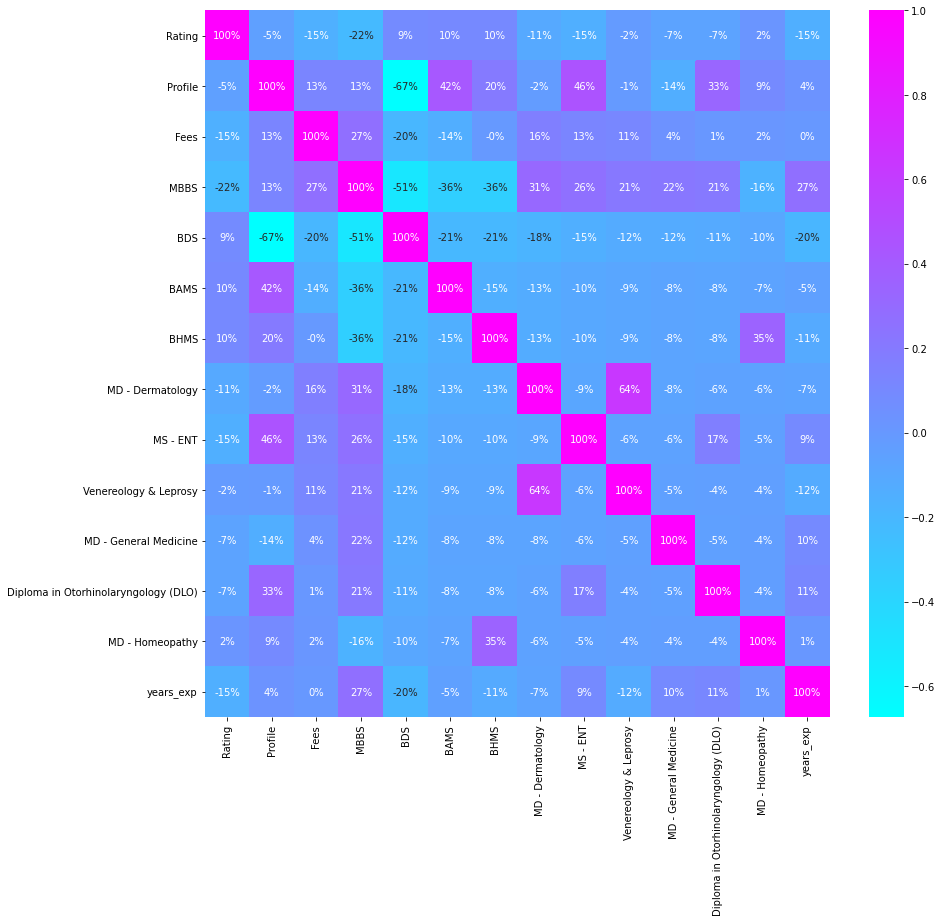

In [67]:
#checking correlaion using heatmap
plt.figure(figsize=(14,13))
sns.heatmap(Train_cor,annot=True,fmt='.0%',cmap='cool')

Text(0.5, 1.0, 'correlation with target variable')

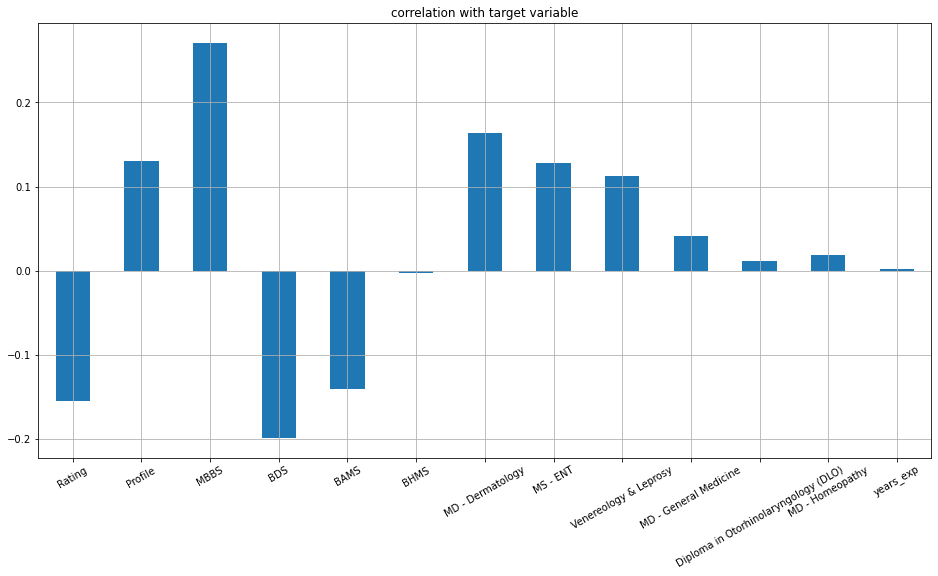

In [68]:
#checking correlation with target variable ie fees
plt.figure(figsize=(16,8))
Train_data.drop('Fees',axis=1,).corrwith(Train_data['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title("correlation with target variable")

Observation:

1- MBBS is highly correlated with target variable among all input variables

2-Rating, BDS, BAMS are negatively correlated with target variable among all input variables.

## **Removing Outliers**

In [69]:
#treating outliers using z score metod
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[0.40632194, 0.52559784, 1.0892288 , ..., 0.50706878, 0.01295428,
        0.12099913],
       [0.06627016, 1.11376215, 0.22022774, ..., 0.50706878, 0.01295428,
        0.12099913],
       [0.40632194, 1.70192646, 0.04166357, ..., 0.50706878, 0.01295428,
        0.12099913],
       ...,
       [0.10375573, 0.65073078, 1.52968429, ..., 0.50706878, 0.01295428,
        0.12099913],
       [1.29393695, 0.65073078, 1.0892288 , ..., 1.97211903, 0.01295428,
        0.12099913],
       [0.40632194, 1.23889509, 0.56544619, ..., 0.50706878, 0.01295428,
        0.12099913]])

In [70]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    8, ..., 5954, 5955, 5958]), array([12, 17, 10, ..., 12,  8, 10]))


In [71]:
train_new=train[(z<3).all(axis=1)]

In [72]:
#checking the shape
print(train.shape,'\t\t',train_new.shape)

(5960, 22) 		 (4107, 22)


In [73]:
train=train_new
train.shape

(4107, 22)

**Feature Selection**

In [74]:
train.shape

(4107, 22)

In [75]:
train.columns

Index(['Rating', 'Profile', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'years_exp', ' Chennai', ' Coimbatore', ' Delhi',
       ' Ernakulam', ' Hyderabad', ' Mumbai', ' Sector 5',
       ' Thiruvananthapuram'],
      dtype='object')

In [76]:
#splitting data into input and output variable
x=train.drop(columns=['Fees'],axis=1)                 #separating independent and target variable
x.head()

,Rating,Profile,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,years_exp,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
1,98,4,0,0,1,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0
2,100,5,1,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0
3,100,4,0,0,1,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0
4,100,4,0,0,1,0,0,0,0,0,0,0,20,1,0,0,0,0,0,0,0
5,100,4,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0


In [77]:
y=train["Fees"]
y.head()

1    350
2    300
3    250
4    250
5    100
Name: Fees, dtype: int64

In [78]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(4107, 21) 		 (4107,)


In [79]:
#remove Skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [80]:
# scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [81]:
# Splittinfg the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [82]:
#checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(3285, 21) 		 (822, 21)


In [83]:
#checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(3285,) 		 (822,)


In [84]:
#Importing all the model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [85]:
#All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
  m.fit(x_train,y_train)
  score=m.score(x_train,y_train)
  predm=m.predict(x_test)
  print('score of',m,'is',score)
  print('MAE',mean_absolute_error(y_test,predm))
  print('MSE',mean_squared_error(y_test,predm))
  print('RMSE',np.sqrt(mean_squared_error(y_test,predm)))
  print('R2_score:',r2_score(y_test,predm))
  print('*********************************************************************************************************************************')
  print('\n')

score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.12571059377008076
MAE 134.62921674999822
MSE 27807.983452193683
RMSE 166.75725906896432
R2_score: 0.13662207807177618
*********************************************************************************************************************************


score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is 0.0640196283311687
MAE 133.97395650403243
MSE 29730.294316296524
RMSE 172.42474972084642
R2_score: 0.07693847095217288
*********************************************************************************************************************************


score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_sam

In [86]:
# Cross Validate  all Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
  score=cross_val_score(m,x,y,cv=10,scoring='r2')
  print("Model:",m)
  print("score:",score)
  print("Mean Score",score.mean())
  print("Standard Deviation:",score.std())
  print('*********************************************************************************************************************************')
  print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
score: [0.13843845 0.1553249  0.12335767 0.0867363  0.17787734 0.06283519
 0.12642658 0.0680508  0.08173123 0.16483932]
Mean Score 0.11856177812439621
Standard Deviation: 0.039392351328918024
*********************************************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
score: [0.05918221 0.08984036 0.08014341 0.00502163 0.08130224 0.09649553
 0.02124336 0.05727168 0.04074469 0.10446695]
Mean Score 0.06357120525775872
Standard Deviation: 0.031361226928047665
*********************************************************************************************************************************


Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_featur

***Decision Tree Regressor is giving best score and r2 score so I choose it as my final model.***

**Using GridSearchCV to find the best parameters**.

In [87]:
from sklearn.tree import DecisionTreeRegressor

parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'random'}


In [88]:
dt=DecisionTreeRegressor(criterion='mae',splitter='random')
dt.fit(x_train,y_train)
print('score:',dt.score(x_train,y_train))
preddt=dt.predict(x_test)
print('\n')
print('Mean absolute Error:',mean_absolute_error(y_test,preddt))
print('Mean Squared Error:',mean_squared_error(y_test,preddt))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,preddt)))
print('\n')
print("r2_score",r2_score(y_test,preddt))

score: 0.441265454192187


Mean absolute Error: 143.06630170316302
Mean Squared Error: 39850.426094890514
Root Mean Squared Error: 199.6257150140996


r2_score -0.23726979803875903


In [90]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,preddt))
print('Mean Squared Error:',mean_squared_error(y_test,preddt))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,preddt)))

Error:
Mean Absolute Error: 143.06630170316302
Mean Squared Error: 39850.426094890514
Root Mean Square Error: 199.6257150140996


**The Best Model is DecisionTreeRegressor because of the score = 0.65 is Maximum**

### **Conclusion**

In [91]:
a=np.array(y_test)
a

array([600, 300, 700, 200, 150, 250, 200, 200, 500, 300,  30, 100, 300,
       450, 300, 300, 600, 250,  50, 100, 500,  70, 300, 300, 200, 100,
       200, 500, 500, 200, 300, 100, 250, 100, 250, 300, 700, 500, 400,
       500, 100, 150, 250, 200, 300, 300, 100, 100, 300, 200, 700, 400,
       600, 300, 500, 100, 200, 200, 300, 200, 200, 500, 300, 250, 300,
       200, 500, 500, 100, 150, 500, 200, 100, 300, 200, 500, 200, 500,
       250, 100,  50, 400, 450, 100, 500, 200, 200, 200, 800, 500, 300,
       700, 200, 200, 100, 100, 400, 100, 300, 100, 200, 150, 500, 300,
       300, 150, 100, 100, 200, 100, 500, 200, 100, 100, 200, 100, 200,
       500, 400, 200, 250, 200, 200, 700, 600, 350, 200, 100, 500, 500,
       100, 200, 200, 500, 450, 500, 600, 100, 100, 800, 100, 200, 300,
       300, 300, 200, 700, 300, 400, 500, 100, 200, 100, 500, 300, 100,
       300, 300, 500, 200, 100, 300, 300, 500, 750, 500, 500, 100, 300,
       100, 100, 250, 300, 200, 250, 500, 200, 500, 300, 500, 30

In [92]:
predicted=np.array(dt.predict(x_test))
predicted

array([350. , 200. , 100. , 200. , 150. , 400. , 100. , 300. , 500. ,
       200. , 200. , 200. , 300. , 175. , 200. , 400. , 100. , 250. ,
       200. , 200. , 500. , 200. , 325. , 200. , 200. , 200. , 200. ,
       500. , 150. , 200. , 100. , 200. , 200. , 100. , 200. , 500. ,
       500. , 200. , 500. , 325. , 250. , 200. , 200. , 200. , 200. ,
       200. , 200. , 700. , 400. , 200. , 800. , 400. , 500. , 400. ,
       200. , 200. , 275. , 300. , 200. , 200. , 450. , 100. , 100. ,
       200. , 200. , 300. , 100. , 400. , 200. , 200. , 500. , 400. ,
       200. , 200. , 200. , 100. , 200. , 100. , 400. , 200. , 300. ,
       600. , 200. , 100. , 200. , 200. , 200. , 300. , 200. , 600. ,
       200. , 275. , 200. , 500. , 200. , 200. , 275. , 200. , 500. ,
       450. , 200. , 200. , 500. , 200. , 200. , 200. , 700. , 200. ,
       200. , 200. , 600. , 200. , 200. , 600. , 200. , 200. , 300. ,
       700. , 200. , 200. , 200. , 200. , 200. , 100. , 300. , 300. ,
       100. , 300. ,

In [93]:
df=pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))

In [94]:
df

,original,predicted
0,600,350.0
1,300,200.0
2,700,100.0
3,200,200.0
4,150,150.0
...,...,...
817,100,200.0
818,500,200.0
819,200,200.0
820,200,200.0


In [95]:
#Saving the Model
import pickle
filename= 'Doctor_fees.pkl'
pickle.dump(dt,open(filename,'wb'))


**Using the test dataset**

In [96]:
#treating outliers using z score metod
from scipy.stats import zscore
z=np.abs(zscore(test))
z

array([[0.43326278, 0.64352685, 1.01470294, ..., 0.44869824, 2.00758057,
        0.09289479],
       [0.43326278, 1.74097263, 1.01470294, ..., 2.22866933, 0.49811201,
        0.09289479],
       [4.74659969, 0.04740198, 1.01470294, ..., 0.44869824, 0.49811201,
        0.09289479],
       ...,
       [0.43326278, 0.64352685, 1.01470294, ..., 0.44869824, 0.49811201,
        0.09289479],
       [0.08793861, 1.23965172, 0.9855101 , ..., 0.44869824, 0.49811201,
        0.09289479],
       [0.43326278, 0.04740198, 1.01470294, ..., 0.44869824, 0.49811201,
        0.09289479]])

In [97]:
threshold=3
print(np.where(z>3))

(array([   1,    2,    2,    6,   11,   13,   14,   16,   17,   17,   17,
         19,   21,   22,   25,   28,   29,   32,   33,   34,   46,   48,
         51,   54,   57,   58,   59,   65,   65,   65,   66,   71,   72,
         73,   76,   79,   81,   82,   91,   95,   96,   99,  101,  102,
        104,  106,  114,  118,  119,  119,  124,  129,  131,  133,  135,
        135,  138,  139,  141,  141,  143,  152,  154,  157,  165,  166,
        168,  168,  168,  171,  174,  174,  179,  179,  181,  187,  195,
        195,  201,  207,  211,  214,  219,  221,  221,  222,  224,  225,
        227,  227,  229,  229,  231,  232,  237,  239,  240,  244,  251,
        251,  253,  253,  254,  256,  258,  258,  260,  261,  261,  261,
        262,  262,  264,  264,  265,  269,  269,  271,  273,  276,  279,
        280,  283,  292,  303,  309,  313,  315,  317,  319,  321,  322,
        323,  323,  327,  330,  336,  337,  338,  341,  347,  349,  352,
        355,  357,  362,  362,  363,  367,  367,  

In [98]:
test_new=test[(z<3).all(axis=1)]

In [99]:
test_new

,Rating,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,years_exp,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,100,1,1,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,1,0
3,100,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,100,0,0,1,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0
5,90,0,0,1,0,0,0,0,0,0,0,0,14,1,0,0,0,0,0,0
7,94,0,0,1,0,0,0,0,0,0,0,0,9,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,100,0,0,1,0,0,0,0,0,0,0,0,17,0,0,0,0,0,1,0
1980,98,0,0,1,0,0,0,0,0,0,0,0,18,1,0,0,0,0,0,0
1982,100,4,0,0,0,1,0,0,0,0,0,0,10,0,0,0,0,0,0,0
1984,100,1,1,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0


In [100]:
# Load the Model
import pickle
fitted_model=pickle.load(open("Doctor_fees.pkl","rb"))

In [101]:
fitted_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [ ]:
#prediction over test data

predictions = fitted_model.predict(test_new)